In [ ]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))
directory = '/teamspace/studios/this_studio/time-series-anomaly-detection'
if os.path.exists(directory):
    os.chdir(directory)

from data.dataset_utils import load_data, preprocess, Subjects, prepare_data, get_dataloader
from _3_autoencoder.plot import plot_losses_and_auc
from _3_autoencoder.test import report
from _3_autoencoder.models.tran_autoencoder import TransformerAutoencoder, TransformerAutoencoder2

In [2]:
df = load_data(filtered=True)
df = preprocess(df, emg_envelope=True, resample_length=2816/2)

## EDA, ECG, EMG

In [6]:
batch_size = 32
mp_filter = 0.25
k=0
signals = ['gsr', 'ecg', 'emg_trapezius']

# for training
train_data_normal, _ = prepare_data(df, signals, classes=[0], train_subjects=Subjects.train, test_subjects=Subjects.val, mp_filter=mp_filter)
train_loader_normal = get_dataloader(train_data_normal, batch_size=batch_size, shuffle=True,  k=k)

# for validation
_, test_data = prepare_data(df, signals, classes=[0, 4], train_subjects=Subjects.train, test_subjects=Subjects.val, mp_filter=mp_filter)
test_loader = get_dataloader(test_data, batch_size=batch_size, shuffle=False , k=k)

# for testing with training data
_, val_train_data = prepare_data(df, train_subjects=Subjects.val, test_subjects=Subjects.all, signals=signals, classes=[0, 4], mp_filter=mp_filter)
val_train_loader = get_dataloader(val_train_data, batch_size=batch_size, shuffle=False, k=k)

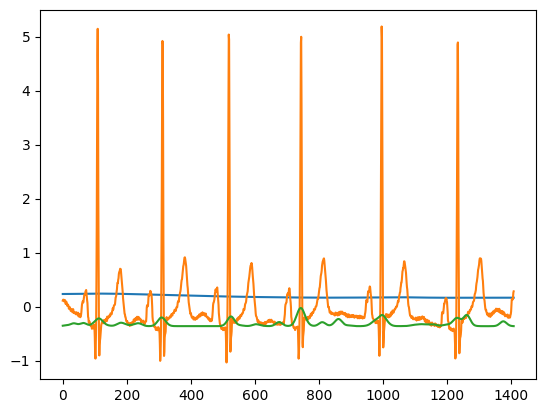

Epoch 1/32 - Train loss: 0.2039 - Val loss normal: 0.2952 - Val loss anomaly: 0.4239 - Val AUC: 0.5331
Epoch 2/32 - Train loss: 0.0811 - Val loss normal: 0.2314 - Val loss anomaly: 0.3437 - Val AUC: 0.5253
Epoch 3/32 - Train loss: 0.0576 - Val loss normal: 0.2081 - Val loss anomaly: 0.3134 - Val AUC: 0.5227
Epoch 4/32 - Train loss: 0.0439 - Val loss normal: 0.1867 - Val loss anomaly: 0.2888 - Val AUC: 0.5312
Epoch 5/32 - Train loss: 0.0349 - Val loss normal: 0.1734 - Val loss anomaly: 0.2730 - Val AUC: 0.5400
Epoch 6/32 - Train loss: 0.0282 - Val loss normal: 0.1630 - Val loss anomaly: 0.2600 - Val AUC: 0.5446
Epoch 7/32 - Train loss: 0.0234 - Val loss normal: 0.1527 - Val loss anomaly: 0.2471 - Val AUC: 0.5461
Epoch 8/32 - Train loss: 0.0201 - Val loss normal: 0.1476 - Val loss anomaly: 0.2403 - Val AUC: 0.5387
Epoch 9/32 - Train loss: 0.0174 - Val loss normal: 0.1407 - Val loss anomaly: 0.2316 - Val AUC: 0.5535
Epoch 10/32 - Train loss: 0.0156 - Val loss normal: 0.1320 - Val loss ano

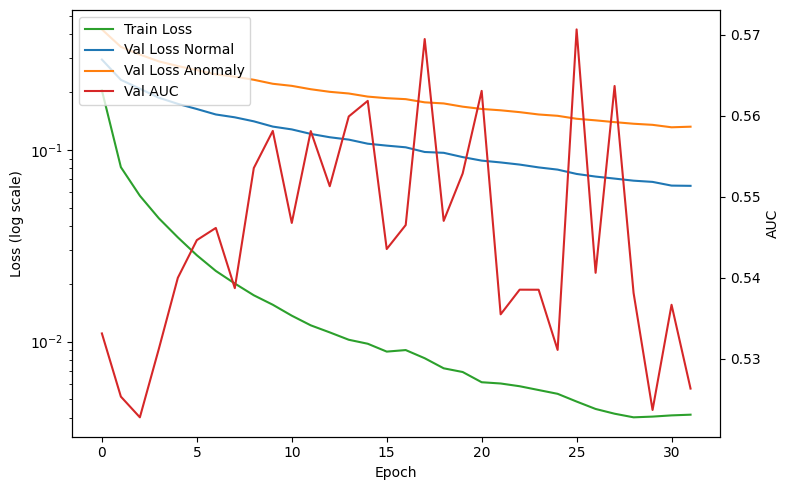

Best AUC: 0.5706 at epoch 26


In [ ]:
config = {
    'n_feats':3,
    'seq_len': 1408,
    'scale': 16,
    'nhead': 8,
    'num_layers': 1,
    'crop_size': 0,
    'batch_size': 32,
    'epochs': 32,
    'lr': 1e-3,
    'print': True,
}

model = TransformerAutoencoder(config)
train_losses, val_losses_normal, val_losses_anomaly, val_auc_scores, evaluation = model.train_model(train_loader_normal, val_loader=test_loader)
plot_losses_and_auc(train_losses, val_losses_normal, val_losses_anomaly, val_auc_scores)

Ground truth: 0
Reconstruction error: 0.05704328790307045


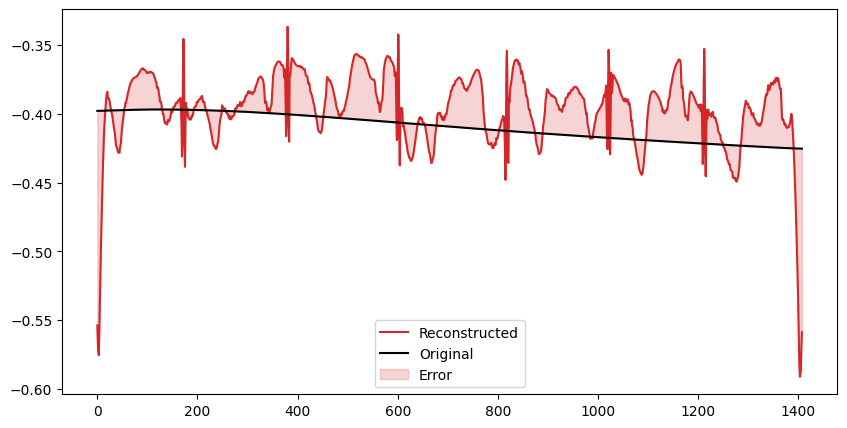

Reconstruction error: 0.05704328790307045


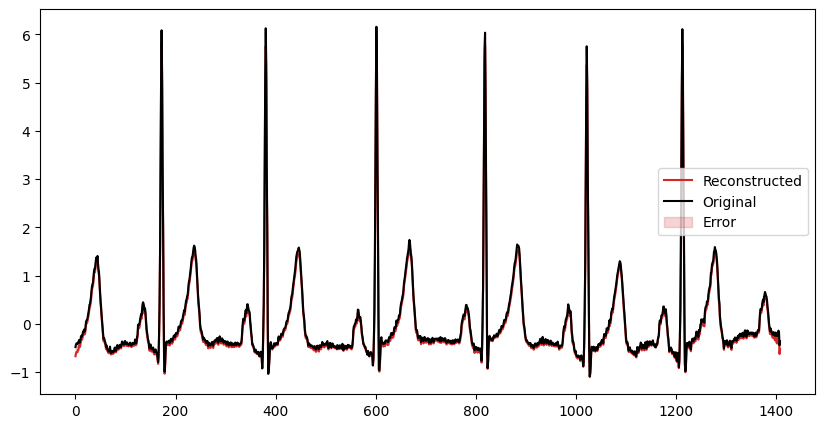

Reconstruction error: 0.05704328790307045


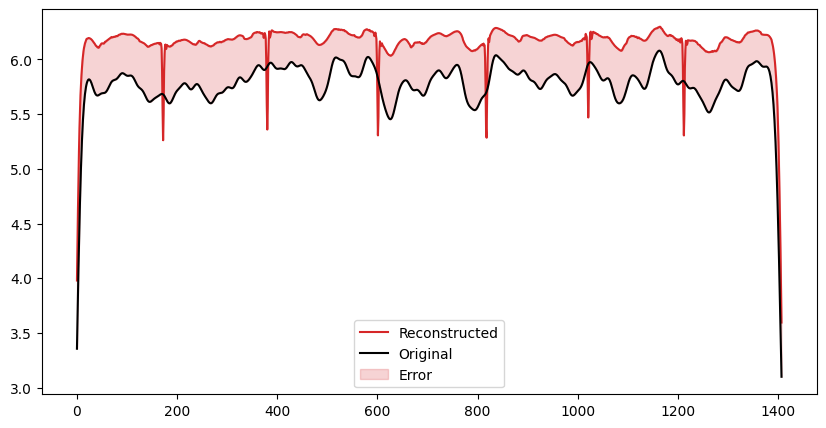

In [ ]:
loader = get_dataloader(test_data, batch_size=1, shuffle=True, k=0)
signals, labels = next(iter(loader))

print(f'Ground truth: {int(labels[0].item())}')
model.plot_reconstruction(signals, index=0)
model.plot_reconstruction(signals, index=1)
model.plot_reconstruction(signals, index=2)

## ECG

In [83]:
batch_size = 32
mp_filter = 0.25
k=7
signals = ['ecg']

# for training
train_data_normal, _ = prepare_data(df, signals, classes=[0], train_subjects=Subjects.train, test_subjects=Subjects.val, mp_filter=mp_filter)
train_loader_normal = get_dataloader(train_data_normal, batch_size=batch_size, shuffle=True,  k=k)

# for validation
_, test_data = prepare_data(df, signals, classes=[0, 4], train_subjects=Subjects.train, test_subjects=Subjects.val, mp_filter=mp_filter)
test_loader = get_dataloader(test_data, batch_size=batch_size, shuffle=False , k=k)

# for testing with training data
_, val_train_data = prepare_data(df, train_subjects=Subjects.val, test_subjects=Subjects.all, signals=signals, classes=[0, 4], mp_filter=mp_filter)
val_train_loader = get_dataloader(val_train_data, batch_size=batch_size, shuffle=False, k=k)

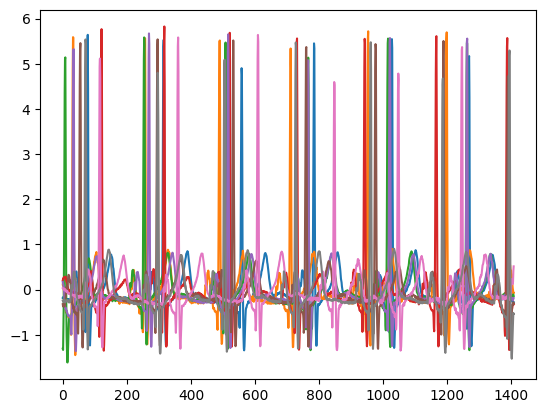

Epoch 1/32 - Train loss: 0.6016 - Val loss normal: 0.4128 - Val loss anomaly: 0.4026 - Val AUC: 0.5064
Epoch 2/32 - Train loss: 0.4189 - Val loss normal: 0.3509 - Val loss anomaly: 0.3426 - Val AUC: 0.5065
Epoch 3/32 - Train loss: 0.3756 - Val loss normal: 0.3149 - Val loss anomaly: 0.3085 - Val AUC: 0.5012
Epoch 4/32 - Train loss: 0.3479 - Val loss normal: 0.2912 - Val loss anomaly: 0.2848 - Val AUC: 0.5038
Epoch 5/32 - Train loss: 0.3301 - Val loss normal: 0.2675 - Val loss anomaly: 0.2652 - Val AUC: 0.5079
Epoch 6/32 - Train loss: 0.3104 - Val loss normal: 0.2519 - Val loss anomaly: 0.2458 - Val AUC: 0.5074
Epoch 7/32 - Train loss: 0.2947 - Val loss normal: 0.2352 - Val loss anomaly: 0.2308 - Val AUC: 0.5100
Epoch 8/32 - Train loss: 0.2775 - Val loss normal: 0.2213 - Val loss anomaly: 0.2169 - Val AUC: 0.5077
Epoch 9/32 - Train loss: 0.2660 - Val loss normal: 0.2101 - Val loss anomaly: 0.2045 - Val AUC: 0.5045
Epoch 10/32 - Train loss: 0.2538 - Val loss normal: 0.2009 - Val loss ano

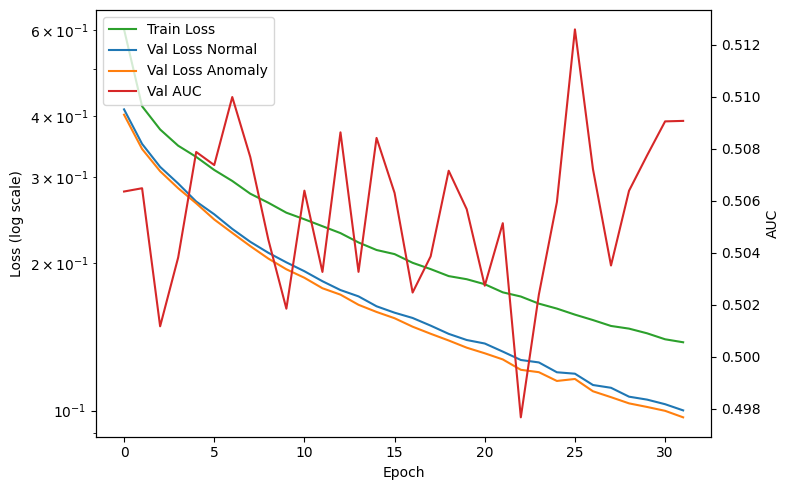

Best AUC: 0.5126 at epoch 26


In [ ]:
config = {
    'n_feats':8,
    'seq_len': 1408,
    'scale': 1,
    'nhead': 4,
    'num_layers': 1,
    'crop_size': 0,
    'batch_size': 32,
    'epochs': 32,
    'lr': 1e-3,
    'contains_context_ecg': True,
    'print': True,
    'latent_dim': 1,
}

model = TransformerAutoencoder2(config)
train_losses, val_losses_normal, val_losses_anomaly, val_auc_scores, evaluation = model.train_model(train_loader_normal, val_loader=test_loader)
plot_losses_and_auc(train_losses, val_losses_normal, val_losses_anomaly, val_auc_scores)

Ground truth: 1
Reconstruction error: 0.03713084012269974


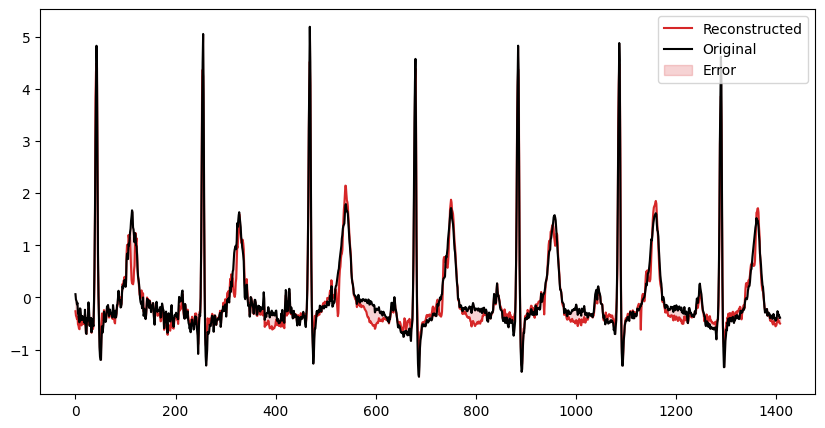

In [ ]:
loader = get_dataloader(test_data, batch_size=1, shuffle=True, k=7)
signals, labels = next(iter(loader))

print(f'Ground truth: {int(labels[0].item())}')
model.plot_reconstruction(signals, index=0)